In [1]:
from lab_bench_go4 import *
import ROOT

outfile = "blah.root"
stream  = "x86l-16"

Welcome to JupyROOT 6.18/02


In [2]:
go4_recompile()

make clean; make
Generating root6 dictionary G__Tamex_Full.cxx ...
Generate dependency G__Tamex_Full.d ... 
Generate dependency TTamex_FullProc.d ... 
Generate dependency TTamex_FullParam.d ... 
Generate dependency TTamex_FullEvent.d ... 
g++ -c TTamex_FullEvent.cxx -O2 -fPIC -Wall -DLinux -pthread -std=c++11 -m64 -I/root-build/include -I/installations/go4/602-00/include -I/installations/go4/602-00 -o TTamex_FullEvent.o 
In file included from TTamex_FullEvent.h:20:0,
                 from TTamex_FullEvent.cxx:14:
TTamex_FullProc.h:202:16: warning: 'l_prev_num_err' defined but not used [-Wunused-variable]
 static  UInt_t l_prev_num_err;
                ^~~~~~~~~~~~~~
TTamex_FullProc.h:201:16: warning: 'l_num_err' defined but not used [-Wunused-variable]
 static  UInt_t l_num_err;
                ^~~~~~~~~
TTamex_FullProc.h:200:16: warning: 'l_prev_err_cha' defined but not used [-Wunused-variable]
 static  UInt_t l_prev_err_cha [MAX_CHA];
                ^~~~~~~~~~~~~~
TTamex_FullProc.h:

In [3]:
go4_calib(outfile="dummy.root",verbose=False,stream=stream)

make new calibration
cp set_TamexControl.C_newCalib set_TamexControl.C

rm Go4AutoSave*

go4analysis -stream x86l-16 -outevt-class TTamex_FullEvent -enable-store -store dummy.root -rate
calibration finished
mv Go4AutoSave.root Go4AutoSave.root_calib

rm dummy.root

success: calib file Go4AutoSave.root_calib was created


In [4]:
go4_take_data(
    timeout=1,
    outfile=outfile,
    verbose=False,
    stream=stream)

rm blah.root

reuse existing calibration
cp set_TamexControl.C_reuseCalib set_TamexControl.C

cp Go4AutoSave.root_calib Go4AutoSave.root

go4analysis -stream x86l-16 -outevt-class TTamex_FullEvent -enable-store -store blah.root -rate
taking data for 1.000 seconds
... done. Data written to file blah.root


In [5]:
##################################################
##          analyze recorded root file          ##
##################################################

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

f = ROOT.TFile(outfile)
tree = f.Get("AnalysisxTree")

GO4-*> TTamex_FullEvent: Create instance  


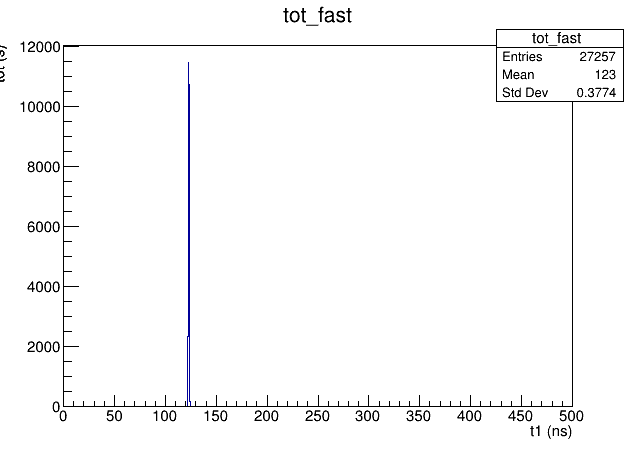

In [9]:
tree.Draw("(fTimeDiff[18] )/1000>>tot_fast(1000,0,500)","","")
tot_fast = f.Get("tot_fast")
tot_fast.SetTitle("tot_fast")
tot_fast.GetXaxis().SetTitle("t1 (ns)")
tot_fast.GetYaxis().SetTitle("tot (s)")
#tot_fast.GetYaxis().SetRangeUser(0,100)
tot_fast.Draw("colz")
c.Draw()

In [12]:
print(tot_fast.GetMean())
print(tot_fast.GetStdDev())

123.00270054086948
0.37744173684406807


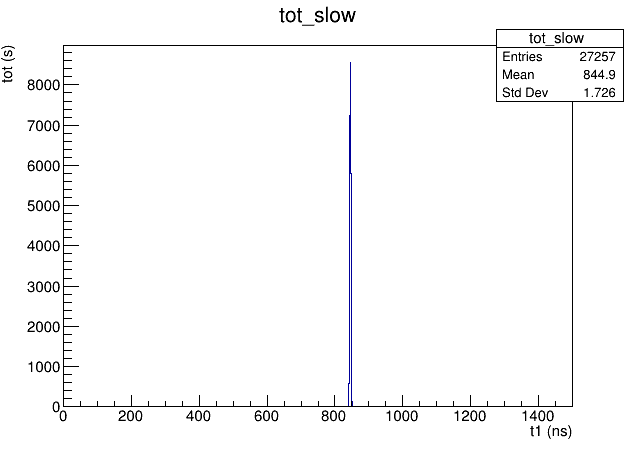

In [10]:
tree.Draw("(fTimeDiff[19] )/1000>>tot_slow(1000,0,1500)","","")
tot_slow = f.Get("tot_slow")
tot_slow.SetTitle("tot_slow")
tot_slow.GetXaxis().SetTitle("t1 (ns)")
tot_slow.GetYaxis().SetTitle("tot (s)")
#tot_slow.GetYaxis().SetRangeUser(0,100)
tot_slow.Draw("colz")
c.Draw()

In [13]:
print(tot_slow.GetMean())
print(tot_slow.GetStdDev())

844.9272545178619
1.726108175831269
